In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

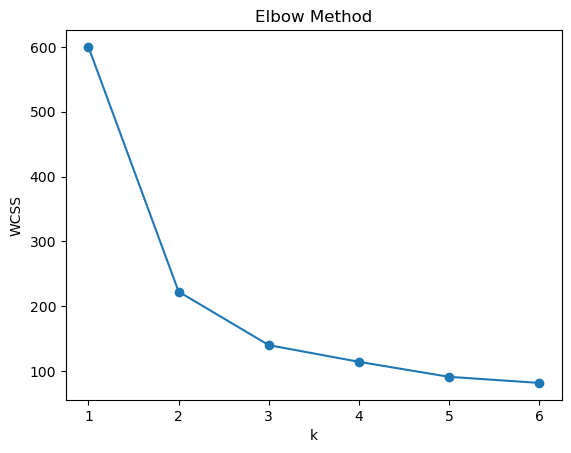

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


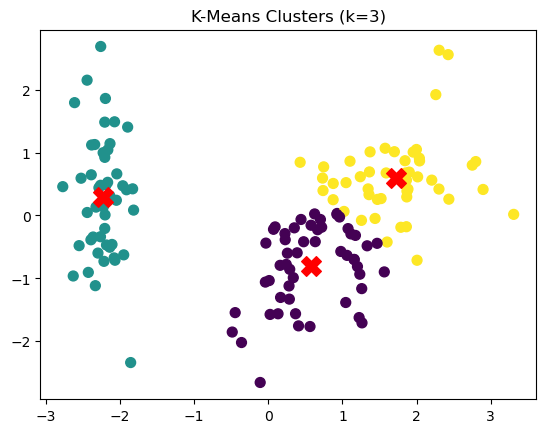

(Text(0.5, 1.0, 'K-Means Clusters (k=3)'), None)

In [3]:
#Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Determine optimal k with elbow method
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 7), sse, '-o')
plt.title('Elbow Method'); plt.xlabel('k'); plt.ylabel('WCSS'); plt.show()

# k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)

# Visualize with PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X_scaled)
plt.scatter(X2[:,0], X2[:,1], c=labels_km, cmap='viridis', s=50)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X')
plt.title('K-Means Clusters (k=3)'), plt.show()


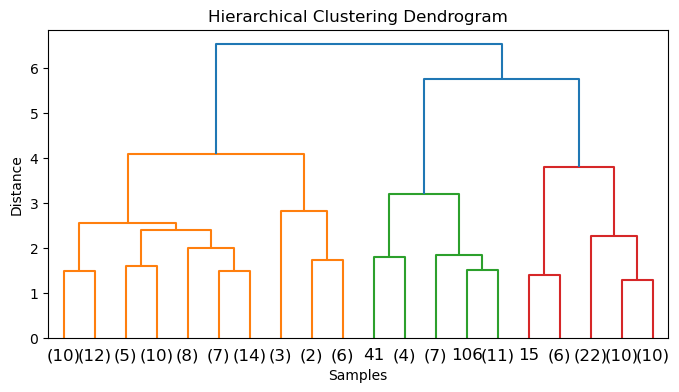

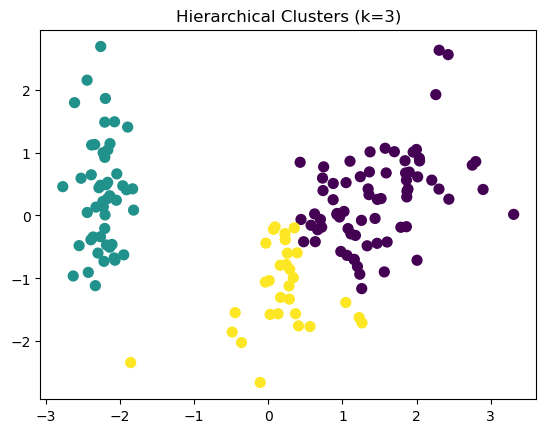

(Text(0.5, 1.0, 'Hierarchical Clusters (k=3)'), None)

In [7]:
# Hierarchical (Agglomerative) Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
link = linkage(X_scaled, method='complete')
plt.figure(figsize=(8,4))
dendrogram(link, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram'); plt.xlabel('Samples'); plt.ylabel('Distance'); plt.show()

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_hc = agg.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X2[:,0], X2[:,1], c=labels_hc, cmap='viridis', s=50)
plt.title('Hierarchical Clusters (k=3)'), plt.show()
